# Part II - Prosper Loans Data Exploration
## by Marshal Ruzvidzo


## Investigation Overview


In the exploration process the main variable of interest was BorrowerAPR, which is the total annual amount paid towards the loan. In the exploration attempted to find the relationship between the Borrower APR and other variables of interest

## Dataset Overview

The data consisted of 113937 loans and 81 variables.
The main variables that were explored included:
1. BorrowerAPR
2. Term
3. ListingCategory (numeric)
4. CreditScoreRangeUpper
5. LoanOriginalAmount
6. IncomeRange
7. DebtToIncomeRatio.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell #enabling to  printing multple outputs on one cell
InteractiveShell.ast_node_interactivity 
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('prosperLoanData.csv')
features=["LoanKey","Term",'LoanStatus','BorrowerAPR',
          'ListingCategory (numeric)','CreditScoreRangeUpper','CreditScoreRangeLower','Occupation',
          'LoanOriginalAmount','IncomeRange',
         'IsBorrowerHomeowner','StatedMonthlyIncome',
         'IncomeVerifiable',
         'DelinquenciesLast7Years','DebtToIncomeRatio']

# selecting data of only interesting features
dfnew=df[features]



df2_clean=dfnew.dropna() # dropping the null data
# debt to income ratio greater than 1 is an outlier
count = df2_clean.loc[df2_clean['DebtToIncomeRatio']> 1].shape[0]
count
# 783 rows were  fount to contain debt to income ration greater than 1 and were removed
index_to_drop = df2_clean['DebtToIncomeRatio'] > 1

# Drop the rows using the boolean index
df2_clean.drop(df2_clean[index_to_drop].index, inplace=True)

# encoding the ListCategory numbers to meaningful categories


# Create the mapping
mapping = {0:'Not Available' ,1:'Debt Consolidation', 2:'Home Improvement' ,3:'Business' ,4:'Personal Loan' ,5:'Student Use' ,6:'Auto', 7:'Student Use' ,8:'Baby&Adoption' ,
          9:'Boat' ,10:'Cosmetic Procedure' ,11:'Engagement Ring' ,12:'Green Loans',13:'Household Expenses' ,14:'Large Purchases', 15:'Medical/Dental' ,16:'Motorcycle' ,17:'RV',
          18:'Taxes' ,19:'Vacation' ,20:'Wedding Loans'}
 
# Use the map function to replace the values in the column with the corresponding mapping values
df2_clean['Listed_Category_new'] = df2_clean['ListingCategory (numeric)'].map(mapping)

In [3]:
#Functions
# Histogram function
def plot_histogram(df, column_name,bins):
    # Plot the histogram
    df[column_name].plot.hist(bins=bins)
    mode_values = df[column_name].mode()
    # Add a vertical line at the mode value
    for mode_value in mode_values:
        plt.axvline(mode_value, color='purple', linestyle='solid', label='Mode')

    
    
    plt.legend()
    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + column_name)
    plt.show()

# Bar graph function for relative frequency

def plot_bar_graph_relfreq(df, column_name):
    # Plot the bar graph
    freq=df[column_name].value_counts()
    rel_freq = freq.div(freq.sum())
    rel_freq.plot.bar()

    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Relative Frequency')
    plt.title('Bar graph of ' + column_name)
    plt.show()


# Bar graph function for frequency

def plot_bar_graph(df, column_name):
    # Plot the bar graph
    freq=df[column_name].value_counts()
    
    freq.plot.bar()
    mode_values = df[column_name].mode()
    for mode_value in mode_values:
        plt.axvline(mode_value, color='purple', linestyle='solid', label='Mode')

    
    
    plt.legend()
    # Add labels and show the plot
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Bar graph of ' + column_name)
    plt.show()


# A function to plot a scatter plot
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter plot'+ ' '+ x + ' '+'against'+' '+ y)
    plt.show()

# A function to blot a box plot
def box_plot(dataframe, x, y):
    df = dataframe[[x,y]]
    plt.figure(figsize=(20,13))
    df.boxplot(by=x, column=y)
    plt.xticks(rotation=90)
    #plt.title('Box plot'+ ' '+ x + ' '+'against'+' '+ y)
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.show()




# A funtion to plot a violin plot
def plot_violin(df:pd.DataFrame,x:str,y:str,hue:str=None):
    """
    This function creates a violin plot in pandas.
    The function takes 3 arguments :
    - df : a pandas dataframe
    - x : a string representing the name of the column to use as x-axis
    - y : a string representing the name of the column to use as y-axis
    - hue : a string representing the name of the column to use as hue (optional)
    """
    ax = plt.figure(figsize=(10,5))
    sns.violinplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'Violin plot of {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


# A function to plot a facet grid
def facet_bar_plot(dataframe, column,x,y):
    g = sns.FacetGrid(dataframe, col=column)
    g.map(sns.scatterplot, x, y)
    return g

## The distribution of loan listed categories
loans

Most of the loans borrowed from Prosper were used for debt consolidation followed by student use categories. The bar chat shows a right skewed  distribution



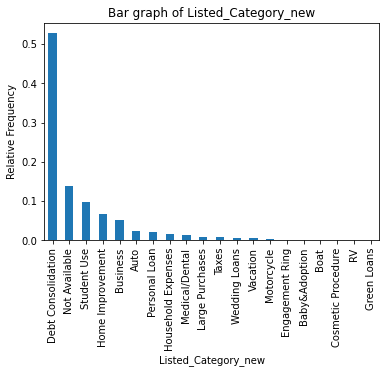

In [4]:
# Plotting
plot_bar_graph_relfreq(df2_clean,'Listed_Category_new')

## The relationship between Borrower APR and CreditScoreRangeUpper

 The data set shows that the CreditScoreRangeUpper increases the BorrowerAPR decreases. Hence if someone has higher credit score he is likely to pay a lower borrower APR compared to those with lower credit scores.

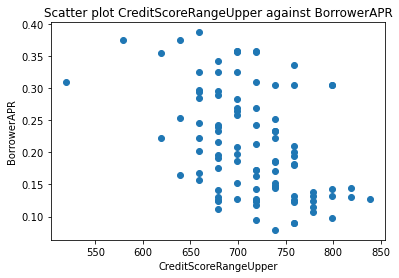

In [5]:
scatter_plot(df2_clean.sample(n=100),'CreditScoreRangeUpper','BorrowerAPR')


## The relationship between  Borrower APR , DebtToIncomeRatio and Term
The debt to income ratio for loans with a term of 12 months was lowest among other terms. Also the range of borrower APR  did not exceed 0.3 and was clustered around 0.15.



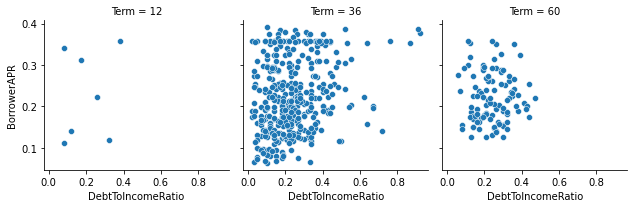

In [6]:
facet_bar_plot(df2_clean.sample(n=500), 'Term','DebtToIncomeRatio','BorrowerAPR')

## The distribution of BorrowerAPR, LoanOriginalAmount and IncomeRange
The LoanOrginalAmount increases as the BorrowerAPR decreases across all income ranges. This is expected because as the borrower APR is paid annually so over a long period the borrower APR annualpayments accumulates.



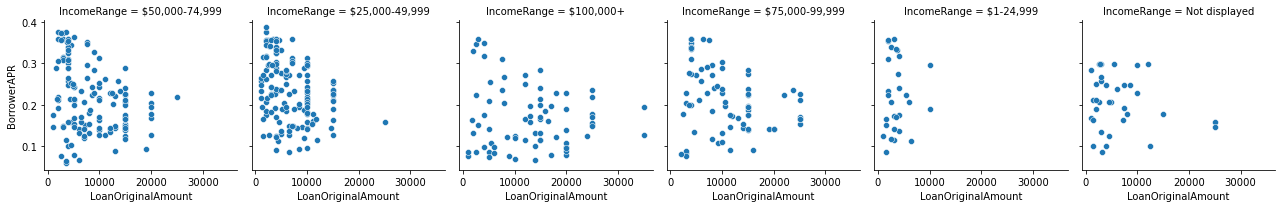

In [7]:
facet_bar_plot(df2_clean.sample(n=500), 'IncomeRange','LoanOriginalAmount','BorrowerAPR')


In [9]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 705059 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\marsh\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\marsh\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\marsh\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\marsh\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\marsh\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "